In [9]:
from model.LTA import LTA
from model import load_model
import torch
from hvo_sequence.hvo_seq import HVO_Sequence
from hvo_sequence.drum_mappings import ROLAND_REDUCED_MAPPING
from bokeh.plotting import show, output_notebook
import os
import timeit
from hvo_sequence.hvo_seq import HVO_Sequence

output_notebook()

# mdl_ = 'misc/LTA/(Smaller) Predict 1 bar ahead, no velocity at inputs_w2ujjpkp/100.pth'
# mdl_ = 'misc/LTA/(Smaller) Predict 2 bar ahead, no velocity at inputs_ycwpquxg/100.pth'

# mdl_ = 'trained_models/(Smaller) Predict 1 bar ahead, no velocity at inputs_5yxlci4h_100.pth'
# mdl_ = 'trained_models/(Smaller) Predict 1 bar ahead, no velocity at inputs_w2ujjpkp_100.pth'
# mdl_ = 'trained_models/(Smaller) Predict 2 bar ahead, no velocity at inputs_ycwpquxg_100.pth'
mdl_ = 'misc/LTA/bass_(step_by_step) Predict 1 bar ahead, no velocity at inputs _qtcoaizp/070.pth'

model = load_model(
    model_path=mdl_,
    model_class=LTA,
    device='cpu',
    is_evaluating=True
)

model.serialize(save_folder=os.path.dirname(mdl_), filename=mdl_.split('/')[-1].replace('.pth', '.pt'))
model.eval()

Loading BokehJS ...

max_look_back_segments: 16
n_segments_per_bar:  16


/home/dtic/miniconda3/envs/GrooveTransformer/lib/python3.9/site-packages/torch/jit/_recursive.py:313: UserWarning: 'norm' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  warnings.warn(


LTA(
  (SegmentEncoder): SegmentEncoder(
    (FCN): Linear(in_features=3, out_features=128, bias=True)
    (relu): ReLU()
  )
  (PerformanceEncoder): PerformanceEncoder(
    (PositionalEncoding): PositionalEncoding(
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (Encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
          )
          (linear1): Linear(in_features=128, out_features=256, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (linear2): Linear(in_features=256, out_features=128, bias=True)
          (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.0, inplace=False)
          (dropout2): Dropout(p=0.0, inplace=False)
        )
      )


In [10]:
# generate a random pattern
hvo = model.generate_random_pattern(n_bars=4)
print(hvo.shape)
# synthesize and display the pattern
hvo_seq = HVO_Sequence(
    beat_division_factors=[4],
    drum_mapping=ROLAND_REDUCED_MAPPING
)
hvo_seq.add_tempo(0, 120)
hvo_seq.add_time_signature(0, 4, 4)
hvo_seq.hvo = hvo[0, :, :].detach().numpy()


# load audio player
from IPython.display import Audio, display
display(Audio(hvo_seq.synthesize(sf_path='hvo_sequence/soundfonts/Standard_Drum_Kit.sf2'), rate=44100))

hvo_seq.to_html_plot(show_figure=True, width=800, height=400)

model.decoder_input_has_velocity



torch.Size([1, 64, 27])


fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


False

In [3]:

start = timeit.default_timer()
model.prime_with_drums(hvo)
print('Time: ', (timeit.default_timer() - start) * 1000, 'ms')

Time:  0.563975001568906 ms


In [4]:
model.generations[:, :16, 3], model.shifted_tgt[:, :17, 3], hvo[0, :16, 3]

(tensor([[0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.]],
        grad_fn=<SelectBackward0>),
 tensor([[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.]],
        grad_fn=<SelectBackward0>),
 tensor([0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.],
        grad_fn=<SelectBackward0>))

In [5]:
start = timeit.default_timer()
model.encode_input_performance(torch.rand(1, 64, 3))
print('Time: ', (timeit.default_timer() - start) * 1000, 'ms')

Time:  4.241383008775301 ms


In [19]:
# load data

from data import PairedLTADatasetV2
max_n_bars = 16

test_dataset = PairedLTADatasetV2(
        input_inst_dataset_bz2_filepath="data/lmd/data_bass_groove_test.bz2",
        output_inst_dataset_bz2_filepath="data/lmd/data_drums_full_unsplit.bz2",
        shift_tgt_by_n_steps=1,
        max_input_bars=max_n_bars,
        hop_n_bars=8
    )

INFO:data.Base.dataLoaders:PairedLTADatasetV2 Constructor --> Loading Cached Version from: cached/TorchDatasets/PairedLTADatasetV2_data_bass_groove_test.bz2_data_drums_full_unsplit.bz2_16_8_1.bz2pickle


In [16]:
test_dataset_longer = PairedLTADatasetV2(
        input_inst_dataset_bz2_filepath="data/lmd/data_bass_groove_test.bz2",
        output_inst_dataset_bz2_filepath="data/lmd/data_drums_full_unsplit.bz2",
        shift_tgt_by_n_steps=1,
        max_input_bars=128,
        hop_n_bars=32
    )

100%|██████████| 378/378 [00:00<00:00, 770.45it/s]


RuntimeError: vstack expects a non-empty TensorList

In [22]:
from model.LTA import LTA
from model import load_model
import torch
from hvo_sequence.hvo_seq import HVO_Sequence
from hvo_sequence.drum_mappings import ROLAND_REDUCED_MAPPING
from bokeh.plotting import show, output_notebook
import os
import timeit
from hvo_sequence.hvo_seq import HVO_Sequence

model = load_model(
    model_path=mdl_,
    model_class=LTA,
    device='cpu',
    is_evaluating=True
)


n_steps_per_seg = 1

model.reset_all()
sample_ix = torch.randint(0, len(test_dataset_longer), (1,)).item()
input_ = test_dataset_longer.instrument1_hvos[sample_ix].unsqueeze(0)[:, :64, :]
# model.prime_with_drums(test_dataset_longer.instrument2_hvos[sample_ix].unsqueeze(0)[:, :32, :])
gens = torch.zeros((1, input_.shape[1], 27))
print(gens.shape)

start = timeit.default_timer()
for i in range(0, int(input_.shape[1]), n_steps_per_seg ):
    if (i % (16 // n_steps_per_seg)) == 0:
        print(f"-------------------Bar {i // (16 // n_steps_per_seg)}-------------------")
    next_K_bars = model.predict_next_K_bars_starting_at(start_=i * n_steps_per_seg, threshold=0.05, print_info=True)
    print(next_K_bars.shape)
    gens[:, i*n_steps_per_seg:(i*n_steps_per_seg+next_K_bars.shape[1]), :] = next_K_bars
    model.encode_input_performance(input_[:, i*n_steps_per_seg:(i+1)*n_steps_per_seg, :])
        
print('Time: ', (timeit.default_timer() - start) * 1000, 'ms')


# play and display the generated pattern
hvo_seq_bass = HVO_Sequence(
    beat_division_factors=[4],
    drum_mapping={'BASS Rhythm': [80]}
)
hvo_seq_bass.add_tempo(0, 120)
hvo_seq_bass.add_time_signature(0, 4, 4)
hvo_seq_bass.hvo = input_[0, :, :].detach().numpy()

hvo_seq = HVO_Sequence(
    beat_division_factors=[4],
    drum_mapping=ROLAND_REDUCED_MAPPING
    
    
)
hvo_seq.add_tempo(0, 120)
hvo_seq.add_time_signature(0, 4, 4)
print(input_.shape[1], 48 * 4)
hvo_seq.hvo = gens[0, :input_.shape[1], :].detach().numpy()

audio1 = hvo_seq.synthesize(sf_path='hvo_sequence/soundfonts/Standard_Drum_Kit.sf2')
audio2 = hvo_seq_bass.synthesize(sf_path='hvo_sequence/soundfonts/Standard_Drum_Kit.sf2',track_n=9, program=0)
audio1 = audio1[:min(audio1.shape[0], audio2.shape[0])]
audio2 = audio2[:min(audio1.shape[0], audio2.shape[0])] * 0.6
display(Audio(audio1+audio2, rate=44100))

hvo_seq_bass.to_html_plot(show_figure=True, width=1400, height=150, filename='Original Bass')
hvo_seq.to_html_plot(show_figure=True, width=1400, height=400)

max_look_back_segments: 16
n_segments_per_bar:  16
torch.Size([1, 64, 27])
-------------------Bar 0-------------------
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segments encoded to generate a pattern - wait until more input is encoded
torch.Size([1, 0, 27])
Not enough segmen

RuntimeError: The expanded size of the tensor (15) must match the existing size (16) at non-singleton dimension 1.  Target sizes: [1, 15, 27].  Tensor sizes: [16, 27]

In [23]:
def batch_data_extractor(data_, device='cpu'):

    bass_solo = data_[0].to(device) if data_[0].device.type != device else data_[0]
    drums = data_[1].to(device) if data_[1].device.type != device else data_[1]
    stacked_bass_drums = data_[2].to(device) if data_[2].device.type != device else data_[2]
    shifted_drums = data_[3].to(device) if data_[3].device.type != device else data_[3]

    return bass_solo, drums, stacked_bass_drums, shifted_drums


def predict_using_batch_data(batch_data, model_=model, device='cpu', mute_bass=False, max_n_bars=32):
    model_.eval()



    bass_solo, drums, stacked_bass_drums, shifted_drums = batch_data_extractor(
        data_=batch_data,
        device=device
    )



    with torch.no_grad():
        h, v, o, hvo, h_logits = model_.sample(
            src=bass_solo[:, :max_n_bars*16, :] if not mute_bass else torch.zeros_like(bass_solo[:, :max_n_bars*16, :]),
            tgt=shifted_drums[:, :max_n_bars*16, :],

        )
    return hvo, h_logits

In [24]:
sample_ix = torch.randint(0, len(test_dataset), (1,)).item()
bass_solo, drums, stacked_bass_drums, shifted_drums = batch_data_extractor(
    data_=test_dataset[sample_ix],
    device='cpu'
)
shifted_drums[1, :] == drums[0, :]


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True])

In [29]:


# select a random sample
import numpy as np
import timeit
sample_ix = np.random.randint(0, len(test_dataset))
print(sample_ix)

hvo, h_logits = predict_using_batch_data(test_dataset[sample_ix:sample_ix+1], model_=model, max_n_bars=32, mute_bass=False)

hvo_gt = test_dataset.instrument2_hvos[sample_ix]
hvo_shifted = test_dataset.instrument2_shifted_hvos[sample_ix]


total = torch.cat([hvo[0], hvo_gt[:32, :]], dim=0)


hvo_seq = HVO_Sequence(
    beat_division_factors=[4],
    drum_mapping=ROLAND_REDUCED_MAPPING,
)
hvo_seq.add_tempo(0, 120)
hvo_seq.add_time_signature(0, 4, 4) 
print(total.cpu().numpy().shape) 
hvo_seq.hvo = total.cpu().numpy()
hvo_seq.to_html_plot(show_figure=True, width=1400, height=400)

hvo[0, 0, :]


2043
(288, 27)


tensor([ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  6.1313e-01,
         1.5843e-01,  3.1756e-01,  7.5549e-02,  4.3887e-02,  1.5586e-02,
         7.9271e-03,  1.9860e-01,  1.9450e-01, -1.1097e-02, -1.4635e-02,
        -1.2530e-02, -4.9514e-03, -2.4536e-03, -3.4646e-04, -1.1034e-03,
        -1.0938e-02, -4.5580e-03])

In [30]:
hvo_seq2 = HVO_Sequence(
    beat_division_factors=[4], 
    drum_mapping=ROLAND_REDUCED_MAPPING
)
hvo_seq2.add_tempo(0, 120)
hvo_seq2.add_time_signature(0, 4, 4)
hvo_seq2.hvo = torch.cat([hvo[0]], dim=0).cpu().numpy()

# load audio player
from IPython.display import Audio
Audio(hvo_seq2.synthesize(sf_path='hvo_sequence/soundfonts/Standard_Drum_Kit.sf2'), rate=44100)


fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


In [ ]:


# hvo_seq = HVO_Sequence(
#     beat_division_factors=[4],
#     drum_mapping=ROLAND_REDUCED_MAPPING
# )
# hvo_seq.add_tempo(0, 120)
# hvo_seq.add_time_signature(0, 4, 4) 
# print(total.cpu().numpy().shape) 
# hvo_seq.hvo = hvo_shifted.cpu().numpy()
# hvo_seq.to_html_plot(show_figure=True, width=1400, height=400)
# 
# hvo_seq = HVO_Sequence(
#     beat_division_factors=[4],
#     drum_mapping=ROLAND_REDUCED_MAPPING
# )
# hvo_seq.add_tempo(0, 120)
# hvo_seq.add_time_signature(0, 4, 4) 
# print(total.cpu().numpy().shape) 
# hvo_seq.hvo = hvo_gt.cpu().numpy()
# hvo_seq.to_html_plot(show_figure=True, width=1400, height=400)



In [41]:

# Auto-regressive prediction
def predict_using_batch_data_auto_Reg(batch_data, model_=model, device='cpu', max_n_bars=32, mute_bass=False,
                                      prime_with_this_hvo=None, mask_bass_vel=True, mask_dec_in_vel=True, use_bernulli=True, temperature=1.0, threshold=0.5, reproduceable=False, 
                                      remove_kicks=False, remove_snares=False, remove_hats=False, remove_toms=False, remove_crashs=False, remove_rides=False):
    model_.eval()
    
    assert not (reproduceable and use_bernulli), "Cannot use be reproduceable if use_bernulli"
    
    bass_solo_, drums_, stacked_bass_drums_, shifted_drums_ = batch_data_extractor(
        data_=batch_data,
        device=device
    )

    bass_solo = bass_solo_.clone()
    shifted_drums = shifted_drums_.clone()
    
    if mask_dec_in_vel:
        shifted_drums[:, :, 9:18] = 0
         
    if isinstance(mask_bass_vel, bool) and mask_bass_vel:
        bass_solo[:, :, 1] = 0
    elif isinstance(mask_bass_vel, float):
        bass_solo[:, :, 1] *= mask_bass_vel

    
    if prime_with_this_hvo is None:
        shifted_in = torch.zeros((1, (max_n_bars) * 16 + 1, 27))
        gens = torch.zeros((1, (max_n_bars) * 16, 27))
        start_at = 0
    else:
        assert prime_with_this_hvo.shape[0] % 16 == 0
        shifted_in = torch.zeros((1, max_n_bars * 16 + prime_with_this_hvo.shape[0] + 1, 27))
        gens = torch.zeros((1, max_n_bars * 16  + prime_with_this_hvo.shape[0], 27))
        start_at = prime_with_this_hvo.shape[0]
        shifted_in[:, 1:start_at+1, :] = prime_with_this_hvo.unsqueeze(0)[:, :, :]
        gens[:, :start_at, :] = prime_with_this_hvo.unsqueeze(0)[:, :, :]
        

    start = timeit.default_timer()
    print("Starting prediction at bar: ", start_at)
    for i in range(start_at, max_n_bars * 16):

        with torch.no_grad():
            thresh = threshold
            sample_bernulli = use_bernulli
            src_ = bass_solo[:, :i+1, :] if not mute_bass else torch.zeros_like(bass_solo[:, :i+1, :])
            print(src_.shape)
            tgt_ = shifted_in[:, :i+1, :]
            if src_.shape[1] != tgt_.shape[1]:
                break    
            
            print(tgt_.shape)
            h, v, o, hvo_, h_logits = model_.sample(
                src=src_,
                tgt=tgt_,
                scale_vel=1.0,
                threshold=thresh,
                use_bernulli=sample_bernulli,
                temperature=temperature
            )
            
            if remove_kicks:
                hvo_[:, :, 0::9] = 0
            if remove_snares:
                hvo_[:, :, 1::9] = 0
            if remove_hats:
                hvo_[:, :, 2::9] = 0
                hvo_[0, :, 3::9] = 0
            if remove_toms:
                hvo_[:, :, 4::9] = 0
                hvo_[:, :, 5::9] = 0
                hvo_[:, :, 6::9] = 0
            if remove_crashs:
                hvo_[:, :, 7::9] = 0
            if remove_rides:
                hvo_[:, :, 8::9] = 0
        
        gens[:, i, :] = hvo_[:, i, :].clone()
        shifted_in[:, i+1, :] = hvo_[:, i, :]
        shifted_in[:, :,  9:18] = 0

    print('Time: ', (timeit.default_timer() - start) * 1000, 'ms')
        
    return gens, h_logits

In [55]:
import numpy as np
import timeit

# sample_ix = np.random.randint(0, len(test_dataset))
# select a random 2 bar sample 
sample_ix = np.random.randint(0, len(test_dataset)) #2373, 3819,1220, 3782, 1539, 1966, 2902, 2507
print(sample_ix)
random_hvo = test_dataset.instrument2_hvos[np.random.randint(0, len(test_dataset))][-32:, :]
primer_hvo = test_dataset.instrument2_hvos[sample_ix][:32, :]

use_bernulli = True
reproduceable = False
temperature = 1.5
threshold = 0.3

hvo, h_logits_w_bass = predict_using_batch_data_auto_Reg(
    test_dataset[sample_ix:sample_ix+1], model_=model, max_n_bars=16, mute_bass=False, prime_with_this_hvo=None,
    mask_bass_vel=True, mask_dec_in_vel=True,
    use_bernulli=use_bernulli, temperature=temperature, threshold=threshold, reproduceable=reproduceable, remove_kicks=False, remove_snares=False, remove_hats=False, remove_toms=False, remove_crashs=False, remove_rides=False)

# hvo_gt = test_dataset.instrument2_hvos[sample_ix][-64:, :]



total = torch.cat([hvo[0, :, :]], dim=0)


hvo_seq = HVO_Sequence(
    beat_division_factors=[4],
    drum_mapping=ROLAND_REDUCED_MAPPING
)

hvo_seq.add_tempo(0, 120)
hvo_seq.add_time_signature(0, 4, 4)
print(total.cpu().numpy().shape)
hvo_seq.hvo = total.cpu().numpy()

bass_map = {'BASS Rhythm': [80]}

hvo_seq_bass = HVO_Sequence(
    beat_division_factors=[4],
    drum_mapping=bass_map
)
hvo_seq_bass.add_tempo(0, 120)
hvo_seq_bass.add_time_signature(0, 4, 4)
hvo_seq_bass.hvo = test_dataset.instrument1_hvos[sample_ix].cpu().numpy()

# load audio player
from IPython.display import Audio, display
audio1 = hvo_seq.synthesize(sf_path='hvo_sequence/soundfonts/Standard_Drum_Kit.sf2')
audio2 = hvo_seq_bass.synthesize(sf_path='hvo_sequence/soundfonts/Standard_Drum_Kit.sf2',track_n=9, program=0)
audio1 = audio1[:min(audio1.shape[0], audio2.shape[0])]
audio2 = audio2[:min(audio1.shape[0], audio2.shape[0])] * 0.6
display(Audio(audio1+audio2, rate=44100))

hvo_seq_bass.to_html_plot(show_figure=True, width=1400, height=150, filename='Original Bass')

hvo_seq.to_html_plot(show_figure=True, width=1400, height=400, filename='Drums With Original Bass')

hvo[0, 0, :]

3004
Starting prediction at bar:  0
torch.Size([1, 1, 3])
torch.Size([1, 1, 27])
torch.Size([1, 2, 3])
torch.Size([1, 2, 27])
torch.Size([1, 3, 3])
torch.Size([1, 3, 27])
torch.Size([1, 4, 3])
torch.Size([1, 4, 27])
torch.Size([1, 5, 3])
torch.Size([1, 5, 27])
torch.Size([1, 6, 3])
torch.Size([1, 6, 27])
torch.Size([1, 7, 3])
torch.Size([1, 7, 27])
torch.Size([1, 8, 3])
torch.Size([1, 8, 27])
torch.Size([1, 9, 3])
torch.Size([1, 9, 27])
torch.Size([1, 10, 3])
torch.Size([1, 10, 27])
torch.Size([1, 11, 3])
torch.Size([1, 11, 27])
torch.Size([1, 12, 3])
torch.Size([1, 12, 27])
torch.Size([1, 13, 3])
torch.Size([1, 13, 27])
torch.Size([1, 14, 3])
torch.Size([1, 14, 27])
torch.Size([1, 15, 3])
torch.Size([1, 15, 27])
torch.Size([1, 16, 3])
torch.Size([1, 16, 27])
torch.Size([1, 17, 3])
torch.Size([1, 17, 27])
torch.Size([1, 18, 3])
torch.Size([1, 18, 27])
torch.Size([1, 19, 3])
torch.Size([1, 19, 27])
torch.Size([1, 20, 3])
torch.Size([1, 20, 27])
torch.Size([1, 21, 3])
torch.Size([1, 21, 

fluidsynth: error: Unknown integer parameter 'synth.sample-rate'
fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


tensor([ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  6.2578e-01,
         1.5755e-01,  3.1584e-01,  7.8439e-02,  6.3505e-02,  1.9157e-02,
         9.2089e-03,  2.0002e-01,  1.8861e-01, -5.3919e-03, -9.7208e-03,
        -5.2135e-03, -3.6114e-03, -2.2586e-03, -2.2532e-04, -1.1533e-03,
        -1.0721e-02, -2.0415e-03])

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f3e646de400>


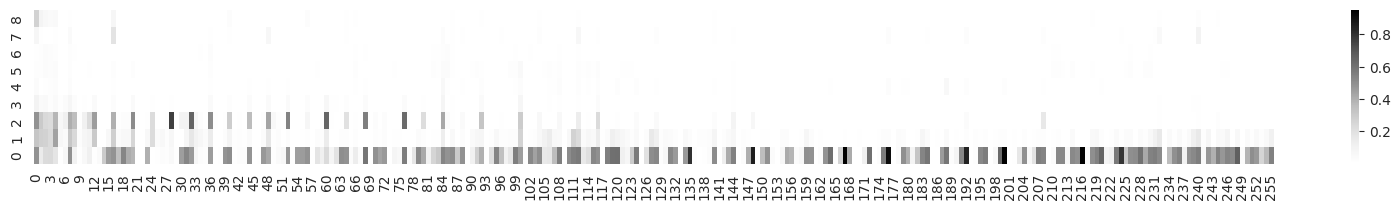

In [54]:
# show logits above one another as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



h_probs_w_bass = torch.sigmoid(h_logits_w_bass[0, :, :]).cpu().numpy().transpose()

fig, ax = plt.subplots(1, 1, figsize=(20, 2))
# use a grey scale colormap with white being the lowest value

# h_probs_w_bass[h_probs_w_bass < threshold] = 0

sns.heatmap(h_probs_w_bass, ax=ax, cmap='Greys')

# flip the y-axis so that the first row of the matrix is at the top
ax.invert_yaxis()

plt.show()

In [34]:
h_probs_w_bass

NameError: name 'h_probs_w_bass' is not defined